In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

## Data  Preprocessing

## Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
)

Found 18365 files belonging to 10 classes.


## Validation Image PreProcessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
)

Found 4591 files belonging to 10 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[176.75 170.75 182.75]
   [173.   167.   179.  ]
   [170.   164.   176.  ]
   ...
   [182.75 176.75 188.75]
   [179.75 173.75 185.75]
   [171.25 165.25 177.25]]

  [[175.   169.   181.  ]
   [167.75 161.75 173.75]
   [167.   161.   173.  ]
   ...
   [180.75 174.75 186.75]
   [178.   172.   184.  ]
   [179.25 173.25 185.25]]

  [[172.25 166.25 178.25]
   [165.25 159.25 171.25]
   [168.5  162.5  174.5 ]
   ...
   [180.   174.   186.  ]
   [182.75 176.75 188.75]
   [180.25 174.25 186.25]]

  ...

  [[166.   159.   167.  ]
   [173.   166.   174.  ]
   [151.75 144.75 152.75]
   ...
   [179.5  174.5  181.5 ]
   [189.5  184.5  191.5 ]
   [175.5  170.5  177.5 ]]

  [[168.   161.   169.  ]
   [173.5  166.5  174.5 ]
   [167.5  160.5  168.5 ]
   ...
   [180.75 175.75 182.75]
   [171.25 166.25 173.25]
   [195.75 190.75 197.75]]

  [[162.5  155.5  163.5 ]
   [164.75 157.75 165.75]
   [162.5  155.5  163.5 ]
   ...
   [177.25 172.25 179.25]
   [185.25 180.25 187.25]
   [185.25 180.25 18

### To avoid Overshooting
1.Choose small learning rate default 0.001 we are taking 0.0001
2.There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more features from images there may be possibility that model unable to capture relevant feature or model is confusing due to lackk of feature so feed with more feature

## Building Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input,Dropout,Flatten,Dense

model = Sequential()
model.add(Input(shape=[128, 128, 3]))  # Define the input shape using Input layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
##  Output Layer
model.add(Dense(units=10,activation='softmax'))

## Compiling Mode

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          15,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [19]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=6)

Epoch 1/6
574/574 ━━━━━━━━━━━━━━━━━━━━ 1423s 2s/step - accuracy: 0.5443 - loss: 1.2882 - val_accuracy: 0.8941 - val_loss: 0.3320
Epoch 2/6
574/574 ━━━━━━━━━━━━━━━━━━━━ 1288s 2s/step - accuracy: 0.9089 - loss: 0.2831 - val_accuracy: 0.9336 - val_loss: 0.1982
Epoch 3/6
574/574 ━━━━━━━━━━━━━━━━━━━━ 1090s 2s/step - accuracy: 0.9490 - loss: 0.1600 - val_accuracy: 0.9532 - val_loss: 0.1405
Epoch 4/6
574/574 ━━━━━━━━━━━━━━━━━━━━ 1091s 2s/step - accuracy: 0.9684 - loss: 0.0949 - val_accuracy: 0.9730 - val_loss: 0.0892
Epoch 5/6
574/574 ━━━━━━━━━━━━━━━━━━━━ 1116s 2s/step - accuracy: 0.9770 - loss: 0.0700 - val_accuracy: 0.9763 - val_loss: 0.0730
Epoch 6/6
574/574 ━━━━━━━━━━━━━━━━━━━━ 1105s 2s/step - accuracy: 0.9772 - loss: 0.0688 - val_accuracy: 0.9719 - val_loss: 0.0939


## Model Evaluation

In [20]:
#model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)


574/574 ━━━━━━━━━━━━━━━━━━━━ 292s 510ms/step - accuracy: 0.9834 - loss: 0.0466


In [21]:
print(train_loss,train_acc)

0.0423971563577652 0.986550509929657


In [22]:
#model Evaluation on Training set
train_loss, train_acc = model.evaluate(validation_set)

144/144 ━━━━━━━━━━━━━━━━━━━━ 78s 537ms/step - accuracy: 0.9715 - loss: 0.1028


## Saving Model

In [40]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.7390144467353821,
  0.9197386503219604,
  0.9536618590354919,
  0.9676014184951782,
  0.9769126176834106,
  0.9798529744148254],
 'loss': [0.7657349109649658,
  0.25036928057670593,
  0.142099991440773,
  0.09676503390073776,
  0.06963159143924713,
  0.05965590476989746],
 'val_accuracy': [0.8941407203674316,
  0.9335656762123108,
  0.9531692266464233,
  0.9729906320571899,
  0.9762579202651978,
  0.971901535987854],
 'val_loss': [0.33203423023223877,
  0.19820374250411987,
  0.1404816210269928,
  0.08918263018131256,
  0.07301051169633865,
  0.09389293938875198]}

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

## Accuracy Visualization

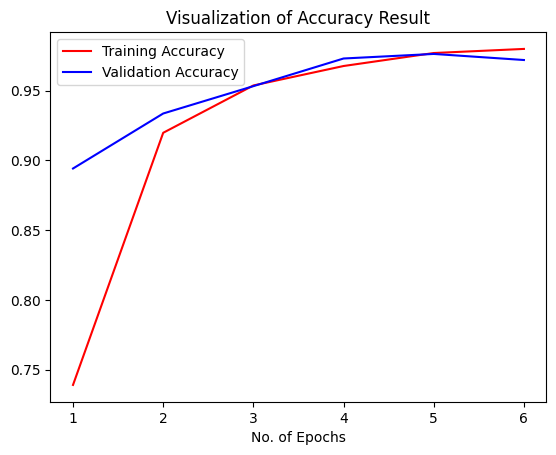

In [33]:
epochs = [i for i in range(1,7)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Common_rust_',
 'Grape___Black_rot',
 'Peach___Bacterial_spot',
 'Potato___Early_blight',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Leaf_Mold']

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4591 files belonging to 10 classes.


In [32]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

4591/4591 ━━━━━━━━━━━━━━━━━━━━ 176s 38ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(4591,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

## Confusion Matrix Visualization

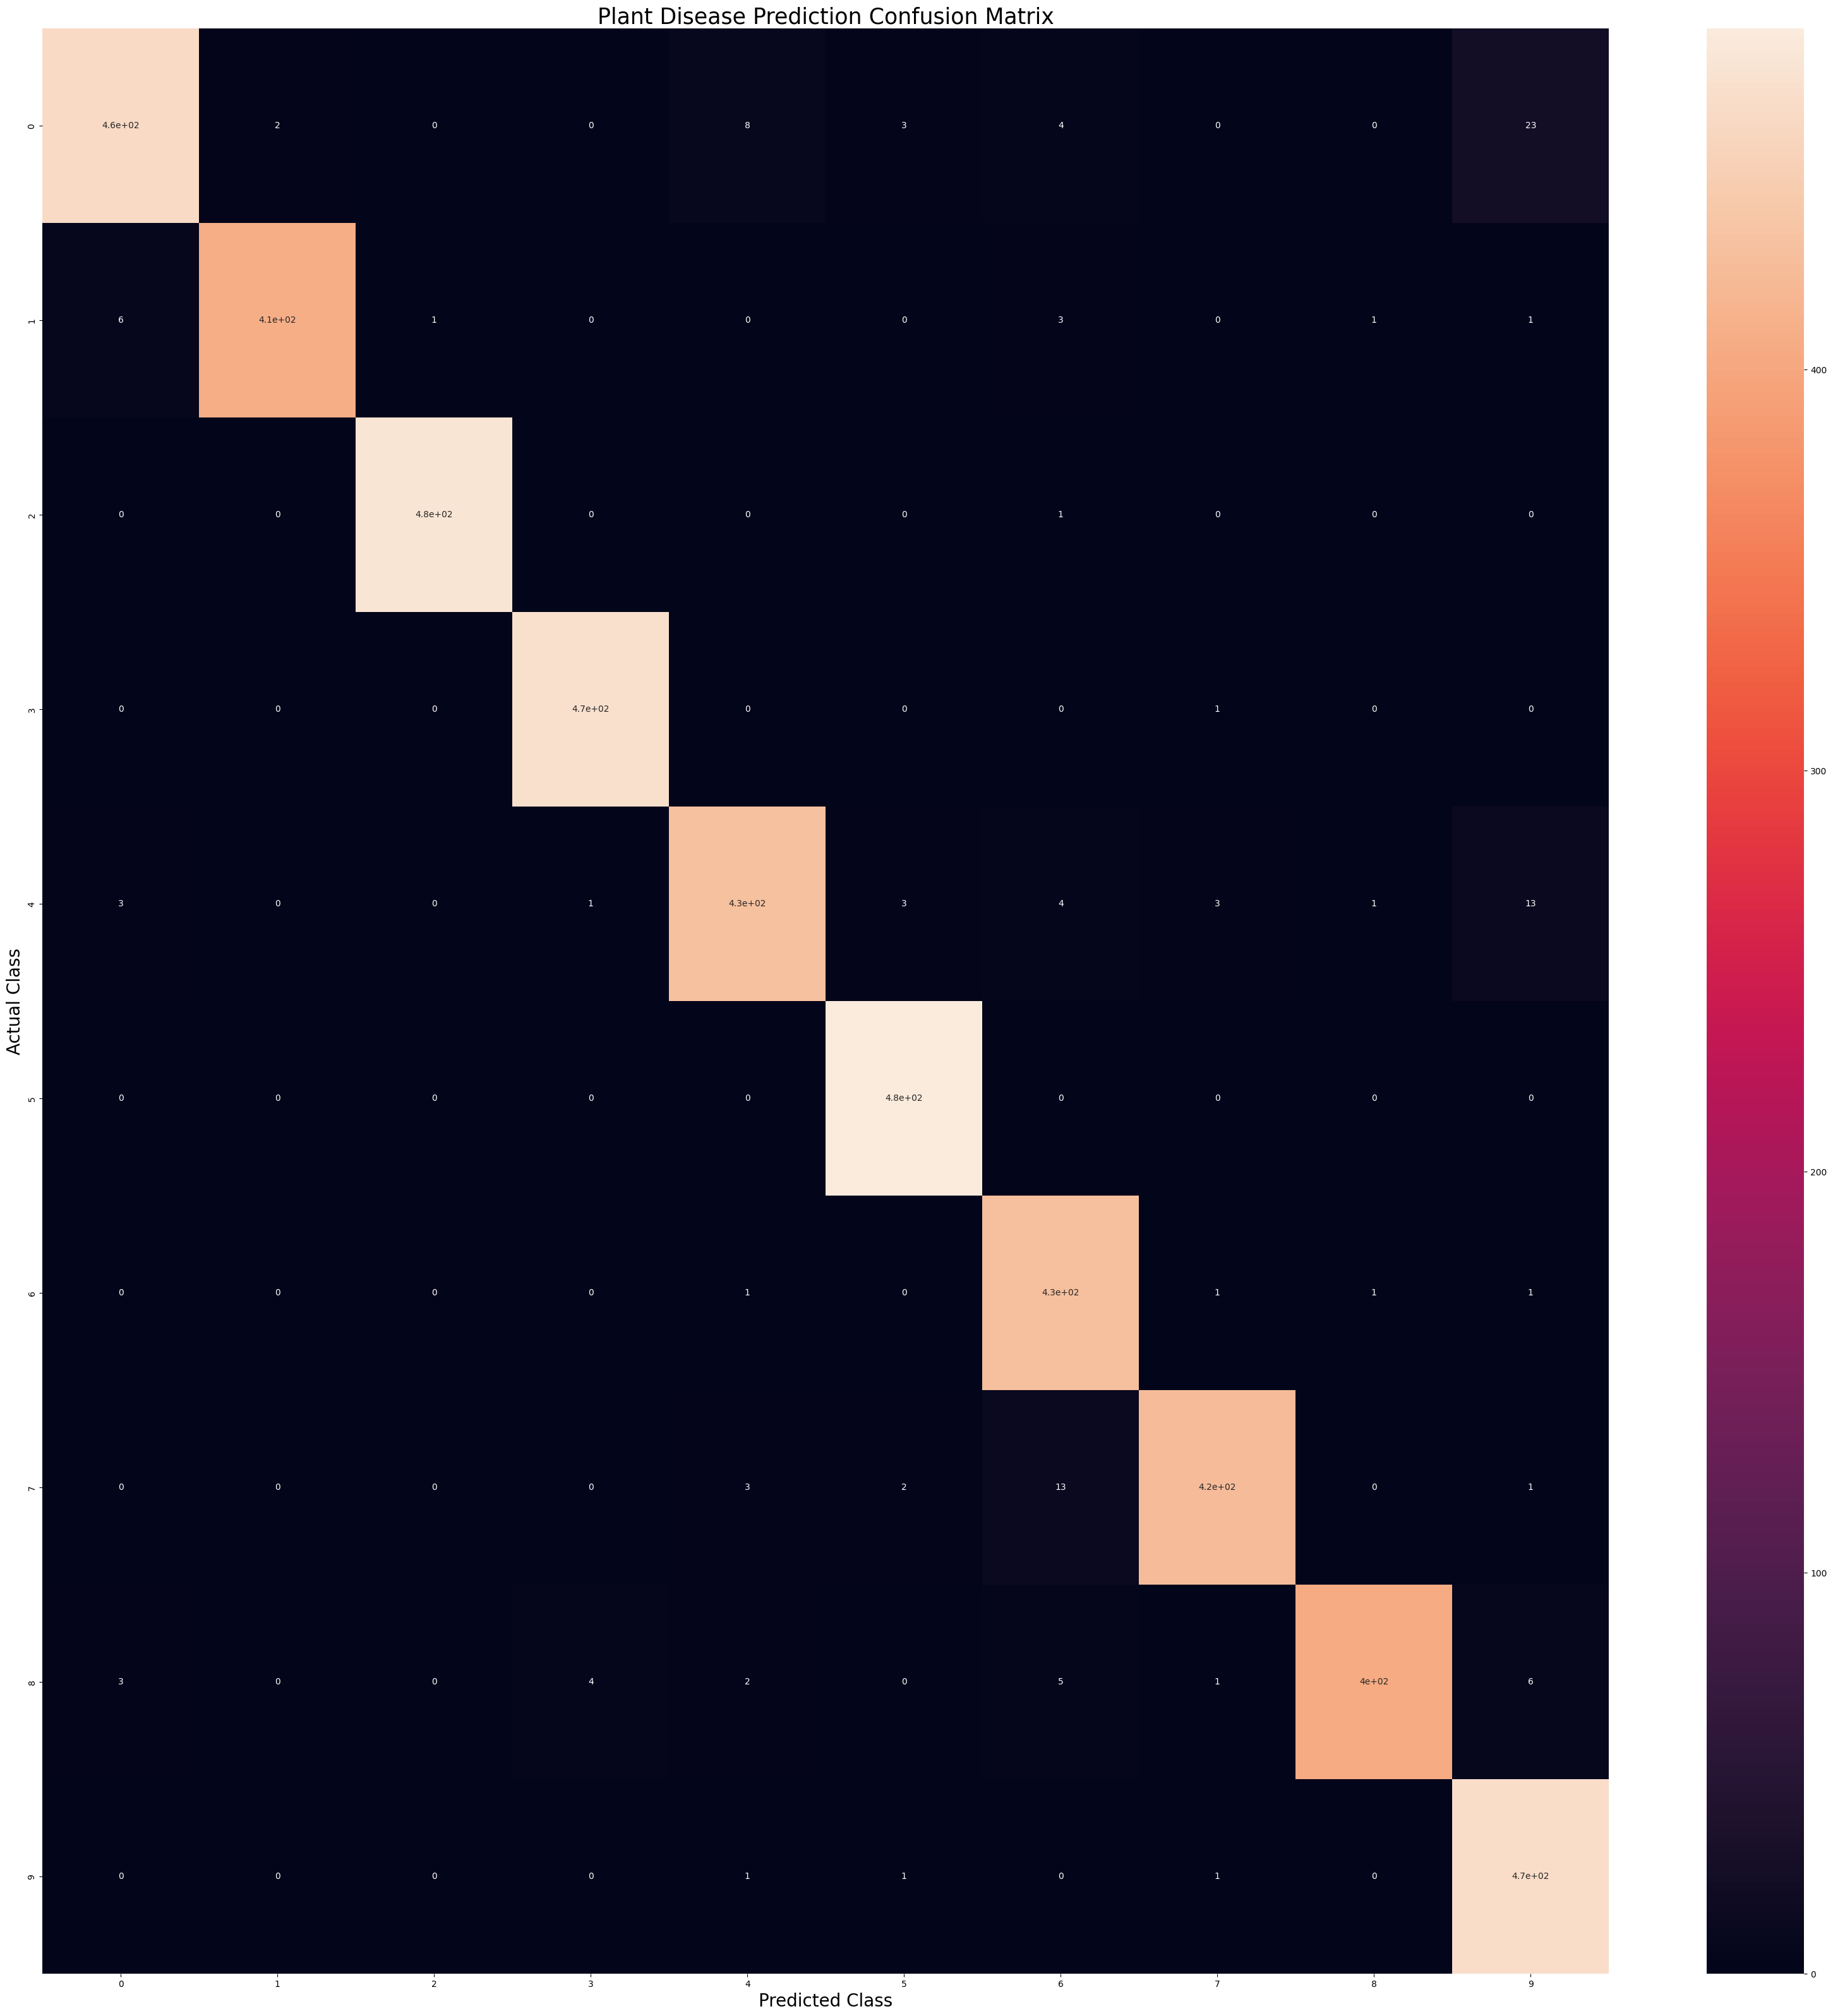

In [39]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()